# Анализ одномерной случайной величины

## 1. Настройка среды

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,8)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns', 21)

In [3]:
df = pd.read_csv('Датасеты/DataSetTelecom_churn.csv',delimiter=';')
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [5]:
df = df[['Intl Calls','Eve Charge','Night Charge','CustServ Calls']]
df

,Intl Calls,Eve Charge,Night Charge,CustServ Calls
0,3,16.78,11.01,1
1,3,16.62,11.45,1
2,5,10.30,7.32,0
3,7,5.26,8.86,2
4,3,12.61,8.41,3
...,...,...,...,...
3328,6,18.32,12.56,2
3329,4,13.04,8.61,3
3330,6,24.55,8.64,2
3331,10,13.57,6.26,2


In [6]:
df.rename(columns={"Intl Calls": "Intl_Calls",'Eve Charge':'Eve_Charge','Night Charge':'Night_Charge','CustServ Calls':'CustServ_Calls'},inplace=True)

## 2. Описание датасета

Название датасета: Telecom Churn Dataset  
Источник датасета: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

* Intl Calls - Количество международных звонков
* Eve Charge - Плата за вечерние звонки
* Night Charge - Плата за ночные звонки
* CustServ Calls - Количество звонков в службу поддержки клиентов

## 3. Непараметрические оценки плостости распределения

In [7]:
# Расчет оптимального количества столбцов гистограммы
def number_of_cols(df_num):
    rows = df_num.shape[0]
    num = np.around(1 + 3.32 * np.log(rows)).astype('int64')
    return num

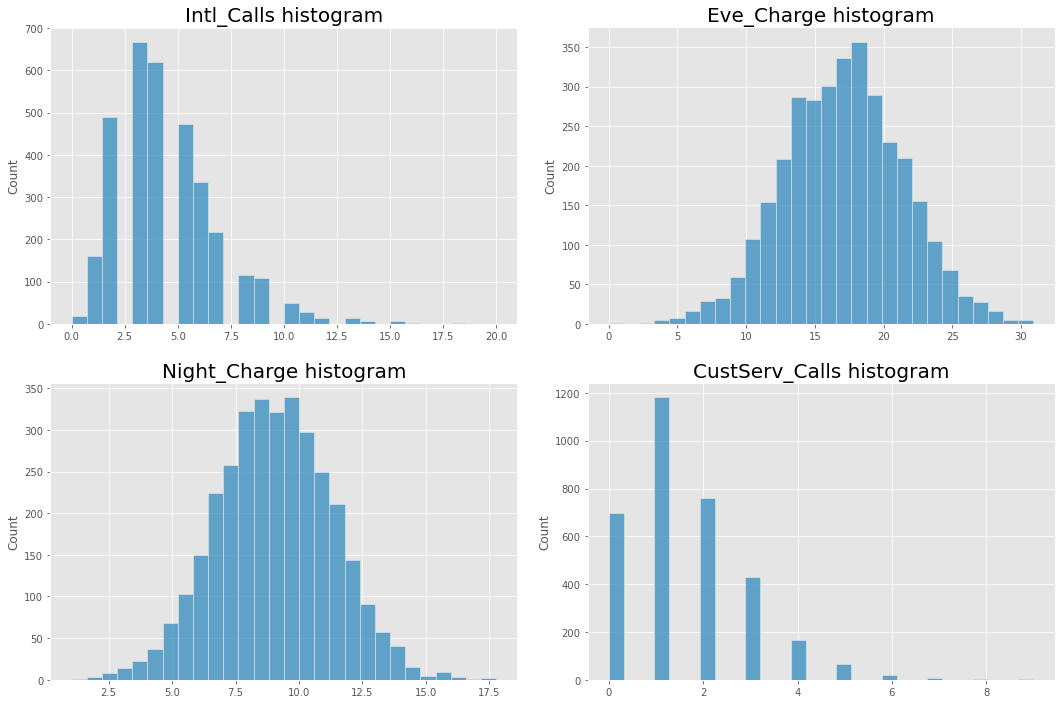

In [8]:
# Гистограммы распределений
import seaborn as sns
plt.figure(figsize=(18,12))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.subplots_adjust(wspace=0.15, hspace=0.2)
    plt.title(df.columns[i-1] + ' histogram', fontsize=20)
    plt.xlabel(' ')
    sns.histplot(data=df, x=df.columns[i-1],bins=number_of_cols(df))

(array([0.00050214, 0.00150643, 0.00401714, 0.00702999, 0.01104713,
        0.01857926, 0.03414567, 0.05172065, 0.07532134, 0.11247987,
        0.1295527 , 0.16219195, 0.16922194, 0.16118767, 0.17022623,
        0.14963839, 0.12503342, 0.10595202, 0.07230849, 0.04569495,
        0.02862211, 0.02008569, 0.00753213, 0.00251071, 0.00451928,
        0.00150643, 0.00050214, 0.00100428]),
 array([ 1.04  ,  1.6375,  2.235 ,  2.8325,  3.43  ,  4.0275,  4.625 ,
         5.2225,  5.82  ,  6.4175,  7.015 ,  7.6125,  8.21  ,  8.8075,
         9.405 , 10.0025, 10.6   , 11.1975, 11.795 , 12.3925, 12.99  ,
        13.5875, 14.185 , 14.7825, 15.38  , 15.9775, 16.575 , 17.1725,
        17.77  ]),
 <BarContainer object of 28 artists>)

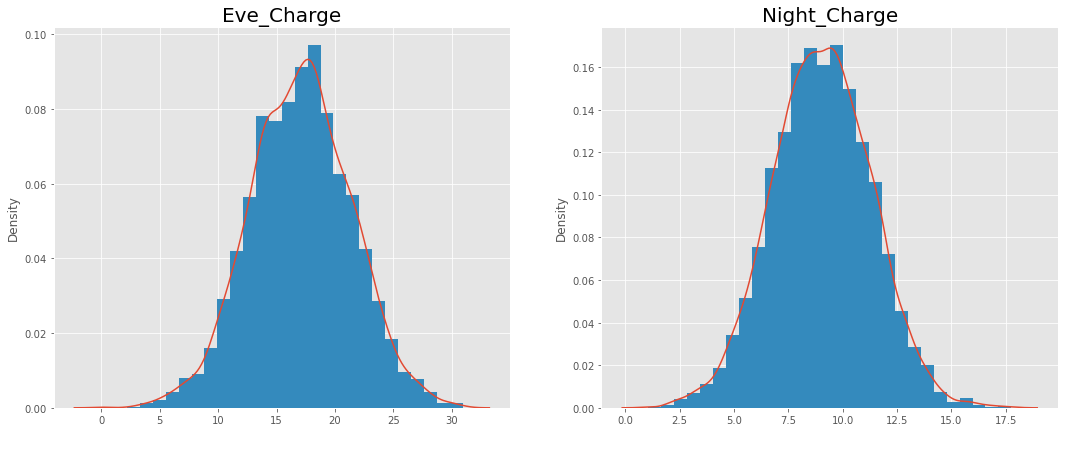

In [9]:
# Ядерная оценка плотности распределения
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.title('Eve_Charge', fontsize=20)
plt.xlabel(' ')
sns.kdeplot(data=df, x='Eve_Charge',bw_adjust=0.9)
plt.hist(df['Eve_Charge'], bins=number_of_cols(df), density=True)

plt.subplot(1,2,2)
plt.title('Night_Charge', fontsize=20)
plt.xlabel(' ')
sns.kdeplot(data=df, x='Night_Charge',bw_adjust=0.88)
plt.hist(df['Night_Charge'], bins=number_of_cols(df), density=True)

In [10]:
df[['Eve_Charge','Night_Charge']].describe()

,Eve_Charge,Night_Charge
count,3333.000000,3333.000000
mean,17.083540,9.039325
std,4.310668,2.275873
min,0.000000,1.040000
25%,14.160000,7.520000
50%,17.120000,9.050000
75%,20.000000,10.590000
max,30.910000,17.770000


## 4. Оценка порядковых статистистик

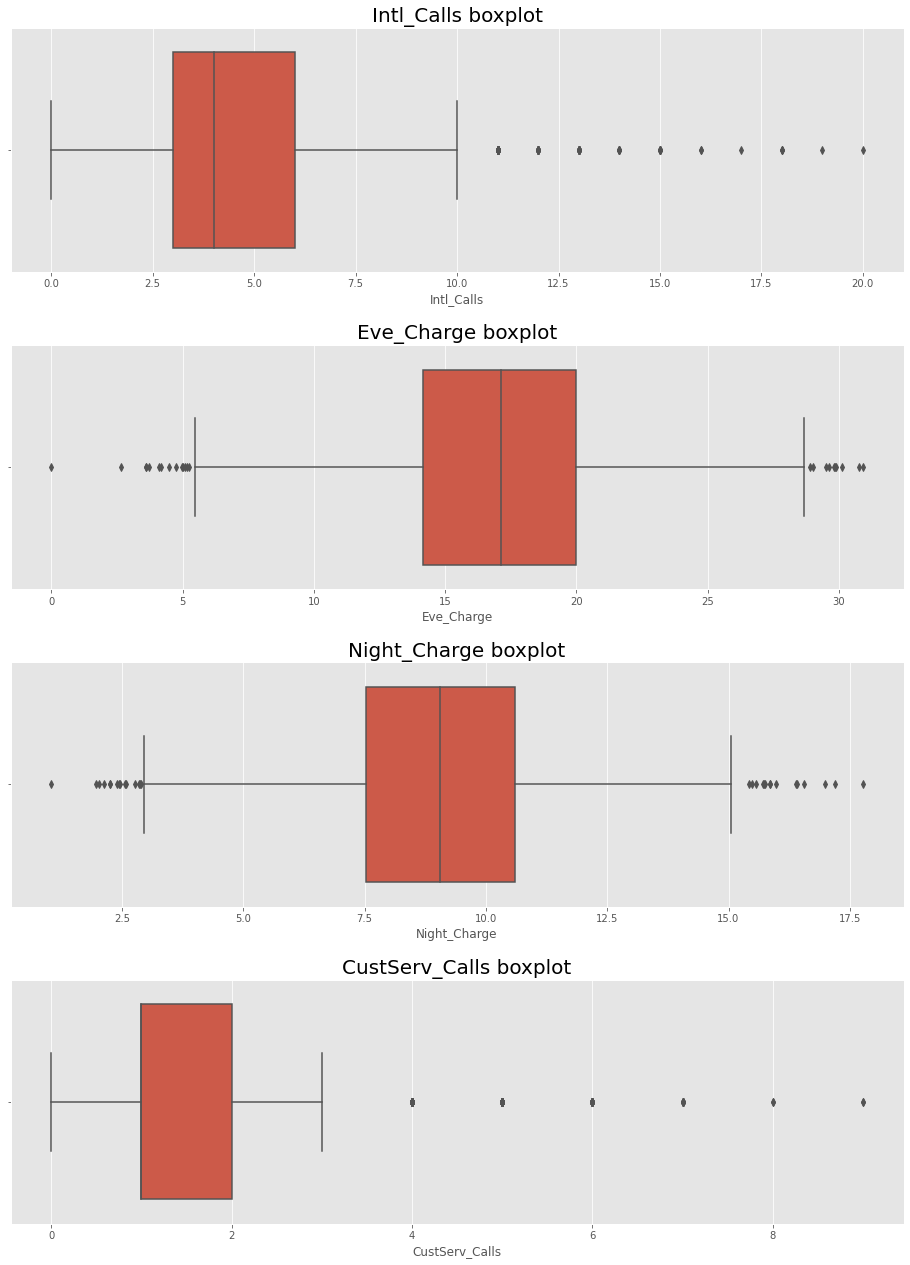

In [11]:
plt.figure(figsize=(16,22))
for i in range(1,5):
    plt.subplot(4,1,i)
    plt.subplots_adjust(hspace=0.3)
    plt.title(str(df.columns[i-1]) + ' boxplot', fontsize=20)
    sns.boxplot(data=df, x=df.columns[i-1])

In [12]:
# Делаем усеченную выборку
def truncated_array(array, tail):
    array_trunc = []
    quantile_top, quantile_bot = np.percentile(array, tail)
    
    for i in array:
        if i < quantile_top and i > quantile_bot:
            array_trunc.append(i)
    return array_trunc

In [13]:
# Выборка для дисретных величин
from sklearn.model_selection import train_test_split

Intl_Calls_train, Intl_Calls_test = train_test_split(df['Intl_Calls'], test_size=0.9, random_state=42)
Intl_Calls_train = Intl_Calls_train[Intl_Calls_train < 10]

CustServ_Calls_train, CustServ_Calls_test = train_test_split(df['CustServ_Calls'], test_size=0.9, random_state=42)
CustServ_Calls_train = CustServ_Calls_train[CustServ_Calls_train < 5]

## 5. Оценка параметров выбранных распределений

### 5.1 Непрерывные СВ

In [14]:
# Строим графики теоретических распределений, подобранных с помощью метода максимального правдоподобия для непрерывной 
# случайной величины
def mle_distplot(array, label):
    
    plot = sns.histplot(array, stat='density')
    plt.title(label, fontsize=20)
    
    list_distr = [scipy.stats.norm, scipy.stats.lognorm,scipy.stats.beta,scipy.stats.alpha,scipy.stats.gamma]
        
    for distribution in list_distr:
        
        x_plot = np.linspace(np.min(array), np.max(array), 100)
        args = distribution.fit(array)
        print('Распределение', type(distribution).__name__, ', аргументы:', args)
        y_plot = distribution.pdf(x_plot, *args)
        
        sns.lineplot(x_plot, y_plot, label=type(distribution).__name__)
        plt.legend()

Распределение norm_gen , аргументы: (17.083540354035403, 4.310020929785403)
Распределение lognorm_gen , аргументы: (0.01315666591769328, -310.2356923176877, 327.2785379923919)
Распределение beta_gen , аргументы: (3198446.609837887, 6101.8215731422715, -176627.9800945064, 176982.05698117032)
Распределение alpha_gen , аргументы: (25.0901334334713, -91.91943369824929, 2729.5544829020055)
Распределение gamma_gen , аргументы: (7948.478029853679, -367.2602158203197, 0.04835417226959933)


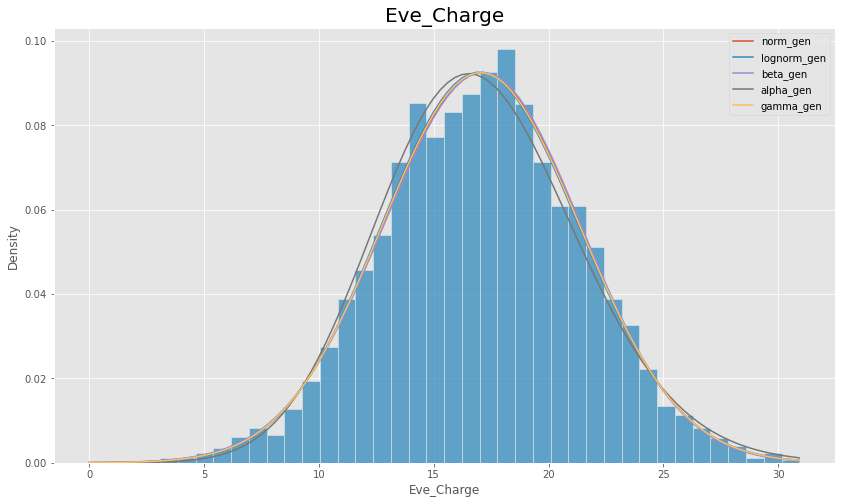

In [15]:
mle_distplot(df.Eve_Charge, 'Eve_Charge')

Распределение norm_gen , аргументы: (9.03932493249325, 2.27553139698034)
Распределение lognorm_gen , аргументы: (0.022489733043791975, -92.0492333641445, 101.06191386233132)
Распределение beta_gen , аргументы: (26667.19197072264, 1113417.6889211086, -366.9772980108215, 16075.591710814553)
Распределение alpha_gen , аргументы: (21.71383821034933, -40.77977976783649, 1079.1016328369813)
Распределение gamma_gen , аргументы: (50692.11498937149, -503.29413069402005, 0.010106767983554013)


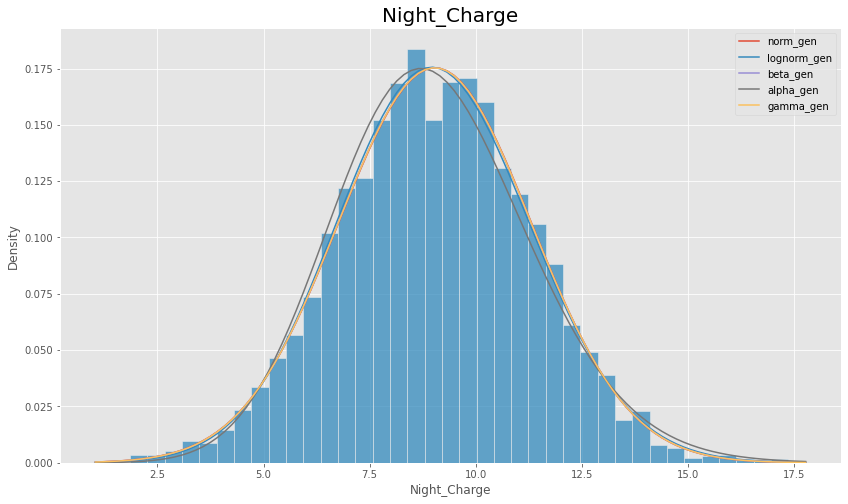

In [16]:
mle_distplot(df.Night_Charge, 'Night_Charge')

In [17]:
#Оценка параметров распределения непрерывной СВ с помощью метода наименьших квадратов
from scipy.optimize import least_squares
def LS_cont(array, distribution):
    
    x0 = distribution.fit(array)
    
    def func(x):
        list_quant = np.arange(0,1,0.05)
        xdata = np.quantile(array, list_quant)[1:]
    
        diff = (abs((distribution.ppf(list_quant, *x)[1:]) - xdata)**2).sum()
        return diff
    
    res = least_squares(func, x0)
    return res.x

In [18]:
# Строим графики теоретических распределений, подобранных с помощью метода наименьших квадратов для непрерывной 
# случайной величины
def ls_distplot(array, label):
    
    list_distr = [scipy.stats.norm, scipy.stats.lognorm,scipy.stats.beta,scipy.stats.alpha,scipy.stats.gamma]
    
    for distr in list_distr:
        args = LS_cont(array, distr)
        print('Распределение', type(distr).__name__, ', аргументы:', args)
        
        sns.histplot(array, stat='density')
        x_plot = np.linspace(np.min(array), np.max(array), 100)
        y_plot = distr.pdf(x_plot, *args)
        sns.lineplot(x_plot, y_plot, label=type(distr).__name__)
        
        plt.title(label, size=20)
        plt.legend()

Распределение norm_gen , аргументы: [17.09442093  4.29032986]
Распределение lognorm_gen , аргументы: [ 1.31101834e-02 -3.10235686e+02  3.27278544e+02]
Распределение beta_gen , аргументы: [3198446.60983789    6101.82157314 -176627.98009451  176982.05698117]
Распределение alpha_gen , аргументы: [  25.09524143  -91.80511885 2729.55683429]
Распределение gamma_gen , аргументы: [ 7.94847803e+03 -3.67260216e+02  4.83541723e-02]


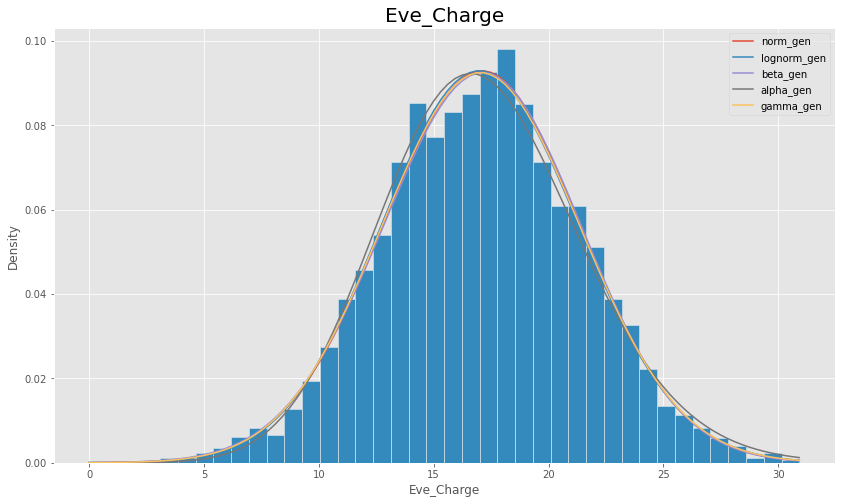

In [19]:
ls_distplot(df['Eve_Charge'], 'Eve_Charge')

Распределение norm_gen , аргументы: [9.04105244 2.264577  ]
Распределение lognorm_gen , аргументы: [ 2.23975869e-02 -9.20485759e+01  1.01062572e+02]
Распределение beta_gen , аргументы: [ 2.66671920e+04  1.11341769e+06 -3.66973150e+02  1.60755918e+04]
Распределение alpha_gen , аргументы: [  21.77671403  -40.59082426 1079.10572338]
Распределение gamma_gen , аргументы: [ 5.06921150e+04 -5.03294131e+02  1.01067680e-02]


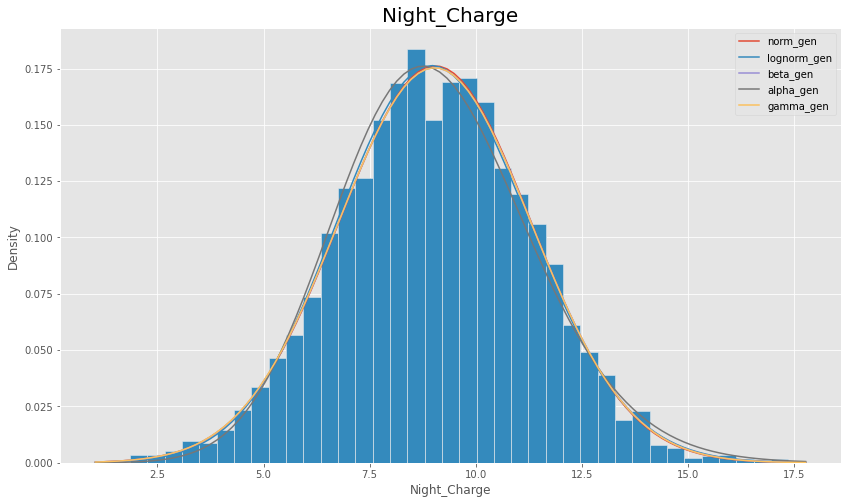

In [20]:
ls_distplot(df.Night_Charge, 'Night_Charge')

### 5.2 Дискретные СВ

In [21]:
# Оцениваем параметры распределения для дискретных величин c помощью метода максимального правдободобия
def discr_fit(array, distribution, bounds):
    res = scipy.stats.fit(distribution, array, bounds)
    args = tuple(res.params)
    return args

In [22]:
Intl_Calls_poisson_params_mle = discr_fit(df['Intl_Calls'], scipy.stats.poisson, [(0, 300)])
Intl_Calls_hypergeom_params_mle = discr_fit(df['Intl_Calls'], scipy.stats.hypergeom, [(3333, 3333),(0, 200),(0, 200)])
CustServ_Calls_poisson_params_mle = discr_fit(df['CustServ_Calls'], scipy.stats.poisson, [(0, 300)])
CustServ_Calls_hypergeom_params_mle = discr_fit(df['CustServ_Calls'], scipy.stats.hypergeom, [(3333, 3333),(0, 200),(0, 200)])

In [23]:
# Параметры усеченных выборок
Intl_Calls_train_poisson_params_mle = discr_fit(Intl_Calls_train, scipy.stats.poisson, [(0, 300)])
Intl_Calls_hypergeom_params_mle = discr_fit(Intl_Calls_train, scipy.stats.hypergeom, [(3333, 3333),(0, 200),(0, 200)])
CustServ_Calls_train_poisson_params_mle = discr_fit(CustServ_Calls_train, scipy.stats.poisson, [(0, 300)])
CustServ_Calls_train_hypergeom_params_mle = discr_fit(CustServ_Calls_train, scipy.stats.hypergeom, [(3333, 3333),(0, 200),(0, 200)])

In [24]:
# Строим графики теоретических распределений для дискретной случайной величины
def discr_distplot(array, distribution, args):
    
    val_sum = array.shape[0]

    categories = array.unique()
    categories.sort()

    pmf = distribution(*args).pmf(categories)
    pmf = (pmf * val_sum).round().astype('int')
    
    plt.bar(categories, pmf, label=type(distribution).__name__)
    sns.histplot(array, label = 'distribution')
    plt.legend()

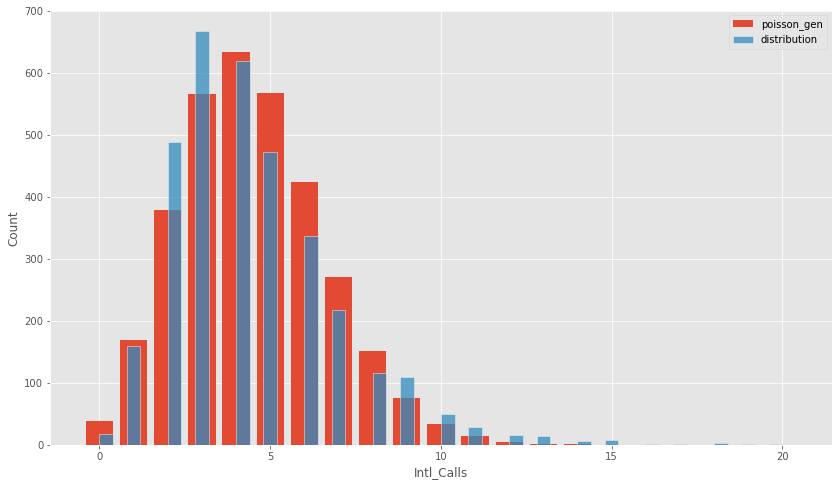

In [25]:
discr_distplot(df['Intl_Calls'], scipy.stats.poisson, Intl_Calls_poisson_params_mle)

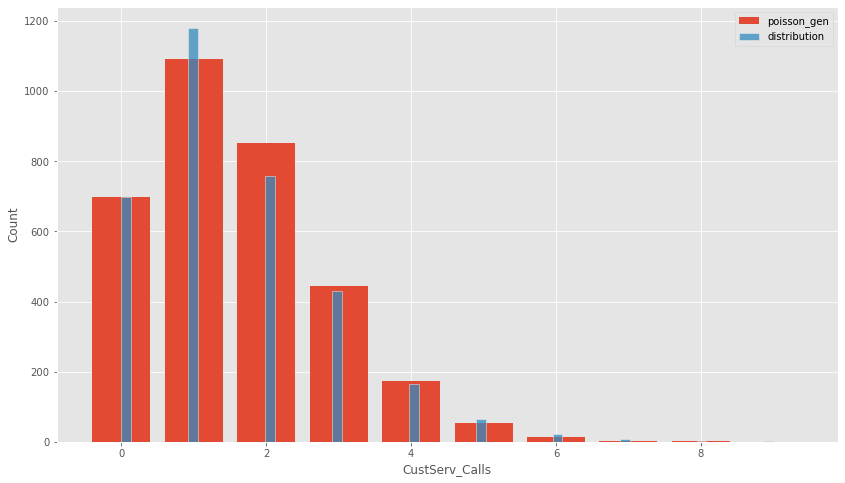

In [26]:
discr_distplot(df['CustServ_Calls'], scipy.stats.poisson, CustServ_Calls_poisson_params_mle)

In [27]:
# Оцениваем параметры распределения для дискретных величин c помощью метода наименьших квадратов
def LS_discr(array, distribution, bounds):
    res = scipy.stats.fit(distribution, array, bounds)
    x0 = tuple(res.params)
    
    val_sum = array.shape[0]
    freq = np.array(array.groupby(array).count())
    
    categories = array.unique()
    categories.sort()
        
    pmf = distribution(*x0).pmf(categories)
    pmf = (pmf * val_sum).round().astype('int')
    
    def func(x):
        diff = (abs(freq - pmf)**2).sum()
        return diff
    
    res = least_squares(func, x0)
    return res.x

In [28]:
Intl_Calls_poisson_params_ls = LS_discr(df['Intl_Calls'], scipy.stats.poisson, [(0, 300)])
Intl_Calls_hypergeom_params_ls = LS_discr(df['Intl_Calls'], scipy.stats.hypergeom, [(3333, 3333),(0, 200),(0, 200)])
CustServ_Calls_poisson_params_ls = LS_discr(df['CustServ_Calls'], scipy.stats.poisson, [(0, 300)])
CustServ_Calls_hypergeom_params_ls = LS_discr(df['CustServ_Calls'], scipy.stats.hypergeom, [(3333, 3333),(0, 200),(0, 200)])

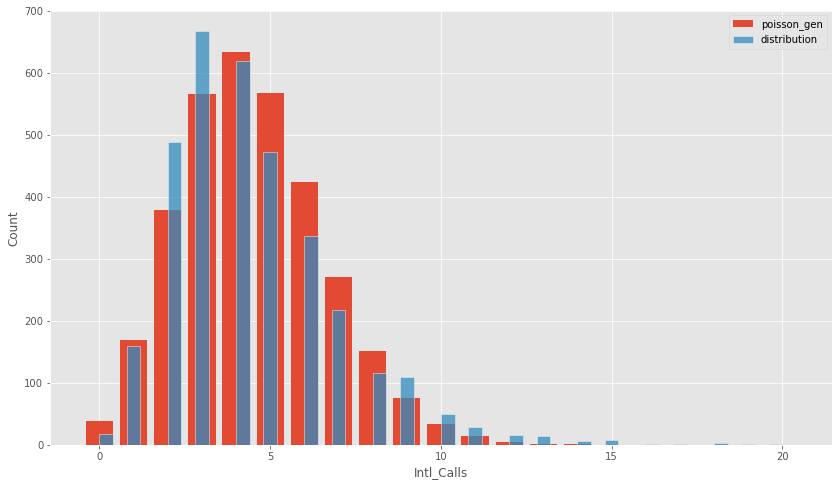

In [29]:
discr_distplot(df['Intl_Calls'], scipy.stats.poisson, Intl_Calls_poisson_params_ls)

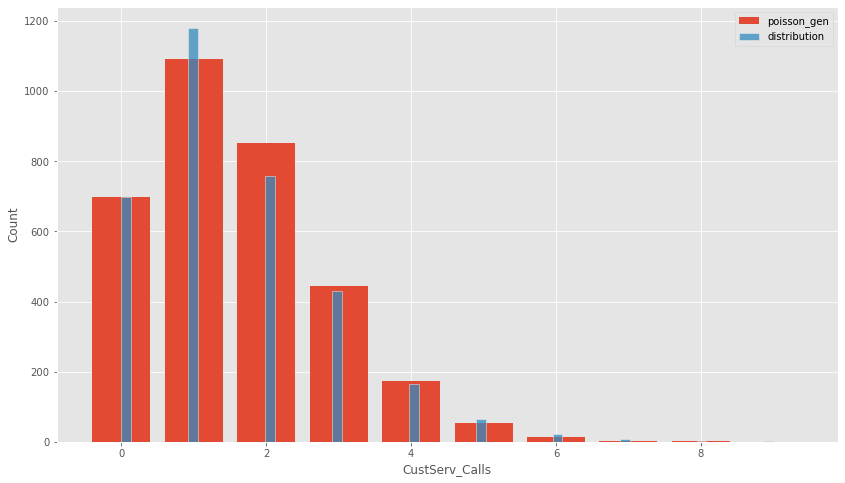

In [30]:
discr_distplot(df['CustServ_Calls'], scipy.stats.poisson, CustServ_Calls_poisson_params_ls)

## 6. Проверка оцененных параметров с помощью квантильного биплота

In [31]:
# Квантильный биплот непрерывных случайных величин
def cont_biplot(array, distribution, label):
    
    figure, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    args = distribution.fit(array)
    print('Распределение', type(distribution).__name__, 'аргументы:', args)
    scipy.stats.probplot(array, dist=distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[1].set_color('black')
    plt.title(f'{label} biplot', fontsize=20)
    
    plt.show()

Распределение gamma_gen аргументы: (7948.478029853679, -367.2602158203197, 0.04835417226959933)


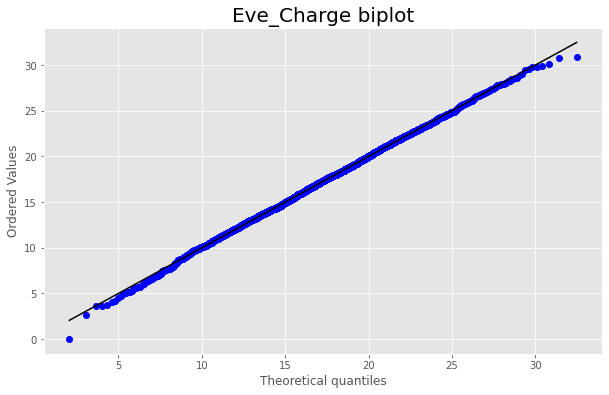

In [32]:
cont_biplot(df.Eve_Charge, distribution=scipy.stats.gamma, label='Eve_Charge')

Распределение beta_gen аргументы: (1.6925126355769433, 1.6738080540042646, 5.237876106744987, 7.560813798062712)


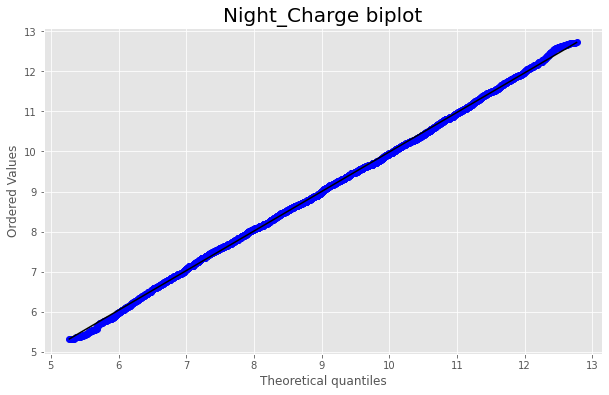

In [33]:
cont_biplot(truncated_array(df.Night_Charge, [95,5]), distribution=scipy.stats.beta, label='Night_Charge')

In [34]:
# Квантильный биплот дискретных случайных величин
def discr_biplot(array, distribution, label, args):
    
    figure, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    print('Распределение', type(distribution).__name__, 'аргументы:', args)
    scipy.stats.probplot(array, dist = distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[1].set_color('black')
    plt.title(f'{label} biplot', fontsize=20)
    
    plt.show()

Распределение poisson_gen аргументы: (4.273005798720996, 0.0)


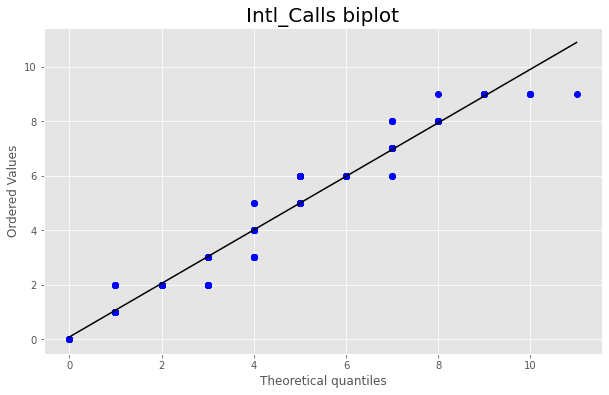

In [35]:
discr_biplot(Intl_Calls_train, scipy.stats.poisson, 'Intl_Calls', Intl_Calls_train_poisson_params_mle)

## 7. Проведение статистических тестов

In [36]:
# Статистические тесты Колмагорова-Смирнова и Омега-квадрат
def stat_test_cont(array, distribution, cdf):
    args = distribution.fit(array)
    
    kstest = scipy.stats.kstest(array, cdf=cdf, args=args).pvalue
    omega2 = scipy.stats.cramervonmises(array, cdf=cdf, args=args).pvalue

    print('Критерий Колмагорова-Смирнова: {:.4f}'.format(kstest))
    print('Критерий Омега-квадрат: {:.4f}'.format(omega2))

In [37]:
stat_test_cont(truncated_array(df.Night_Charge, [95,5]), distribution=scipy.stats.beta, cdf='beta')

Критерий Колмагорова-Смирнова: 0.3092
Критерий Омега-квадрат: 0.3315


In [38]:
stat_test_cont(df.Eve_Charge, distribution=scipy.stats.gamma, cdf='gamma')

Критерий Колмагорова-Смирнова: 0.7759
Критерий Омега-квадрат: 0.9033


In [39]:
# Проверяем нулевую гипотезу о том, что категориальные данные имеют заданные частоты теоретического распределения
def stat_test_chi2(array, distribution, args):

    val_sum = array.shape[0]
    freq = np.array(array.groupby(array).count())
    
    categories = array.unique()
    categories.sort()
        
    pmf = distribution(*args).pmf(categories)
    pmf = (pmf * val_sum).round().astype('int')
    
    if abs(freq.sum() - pmf.sum()) > 0:
        rest = freq.sum() - pmf.sum()
        pmf[pmf.argmax()] += rest
    
    p_value = scipy.stats.chisquare(f_obs = freq, f_exp = pmf)[1]
    
    print('Критерий Хи-квадрат: {:.5f}'.format(p_value))

In [40]:
stat_test_chi2(df['CustServ_Calls'], scipy.stats.poisson, CustServ_Calls_poisson_params_mle)

Критерий Хи-квадрат: 0.00000


In [41]:
stat_test_chi2(df['Intl_Calls'], scipy.stats.hypergeom, Intl_Calls_hypergeom_params_mle)

Критерий Хи-квадрат: 0.00000


In [42]:
stat_test_chi2(Intl_Calls_train, scipy.stats.poisson, Intl_Calls_train_poisson_params_mle)

Критерий Хи-квадрат: 0.12448


In [43]:
stat_test_chi2(CustServ_Calls_train, scipy.stats.hypergeom, CustServ_Calls_train_hypergeom_params_mle)

Критерий Хи-квадрат: 0.26608


## 8. Сэмплирование случайной величины

In [44]:
# Семплирование непрерывной СВ методом обратной функции
def cont_inverse_sampling(array, distribution):
    args = distribution.fit(array)
    x_array = np.random.rand(2000)
    inverse = distribution.ppf(x_array, *args)
    
    sns.histplot(array, stat='density', label = 'distribution')
    sns.kdeplot(x=inverse, label = 'sample')
    plt.legend()

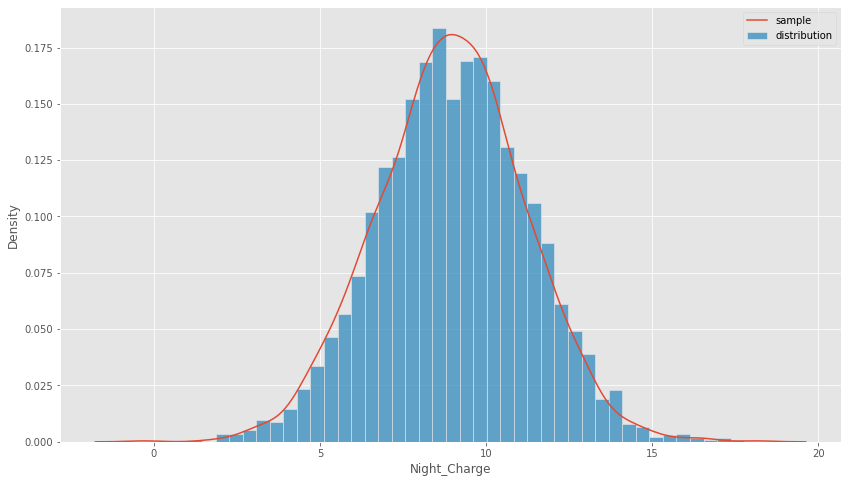

In [45]:
cont_inverse_sampling(df['Night_Charge'], scipy.stats.beta)

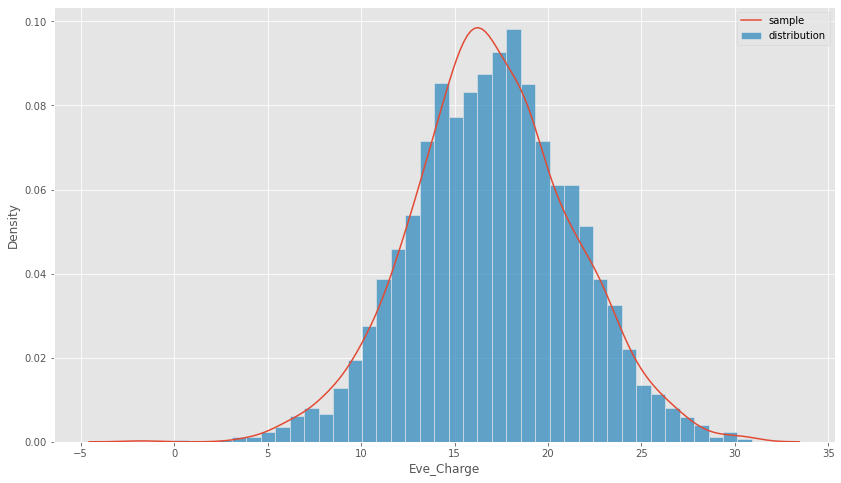

In [46]:
cont_inverse_sampling(df['Eve_Charge'], scipy.stats.gamma)

In [47]:
# Семплирование дискретной СВ методом обратной функции
def discr_inverse_sampling(array, distribution, args):
    x_array = np.random.rand(2000)
    inverse = distribution.ppf(x_array, *args).round()
    
    sns.histplot(inverse, stat='density', label = 'sample', color='red')
    sns.histplot(array, stat='density', label = 'distribution')
    plt.legend()

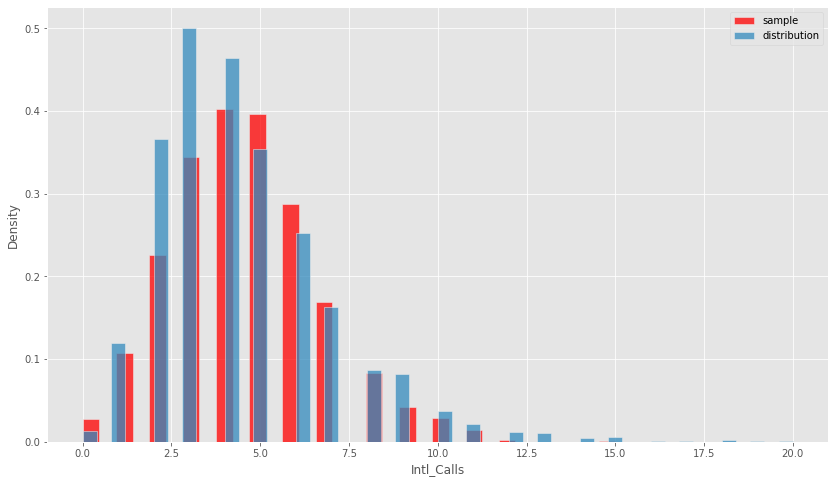

In [48]:
discr_inverse_sampling(df['Intl_Calls'], scipy.stats.poisson, Intl_Calls_poisson_params_mle)

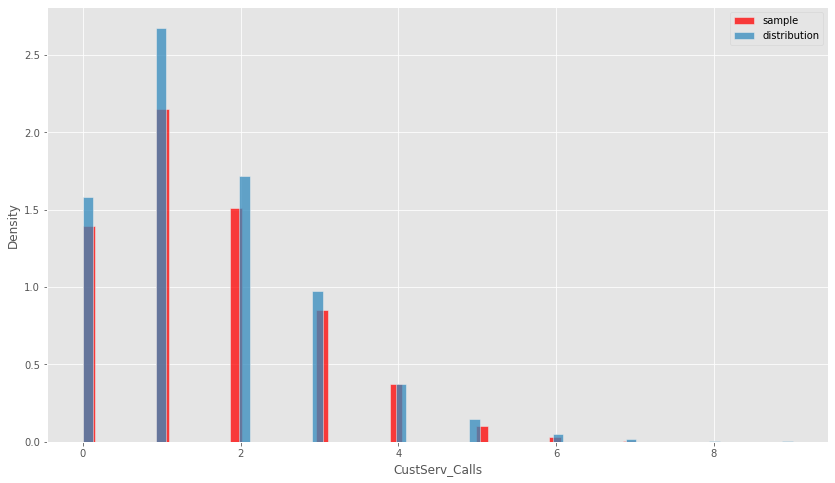

In [49]:
discr_inverse_sampling(df['CustServ_Calls'], scipy.stats.poisson, CustServ_Calls_poisson_params_mle)

In [56]:
# Подбор теоретического распределния методом accept-reject
def select_disctr(array, distribution, params, M):
    
    x_plot = np.linspace(np.min(array), np.max(array), 100)
    g_vals = scipy.stats.norm.pdf(x_plot, *params)
    args = distribution.fit(array)


    y_plot = distribution.pdf(x_plot, *args)
    sns.lineplot(x_plot, y_plot, label=type(distribution).__name__)
    plt.plot(x_plot, M*g_vals, label='norm_gen')
    plt.legend()

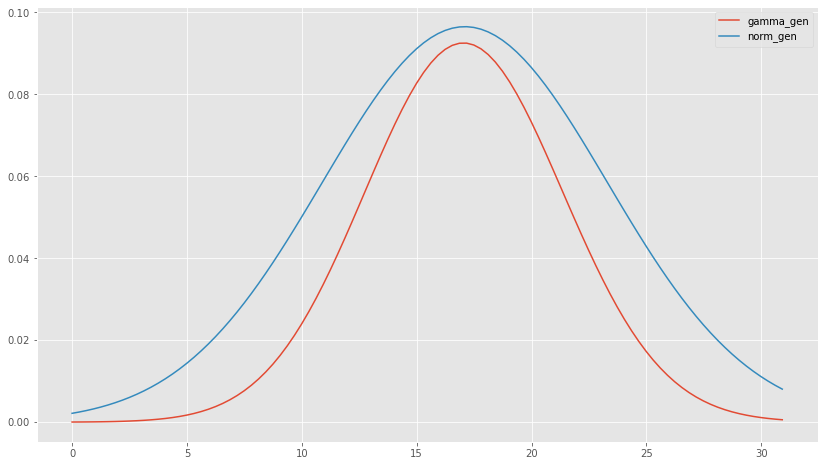

In [57]:
select_disctr(df['Eve_Charge'], scipy.stats.gamma, [17.09442093 , 6.2], 1.5)

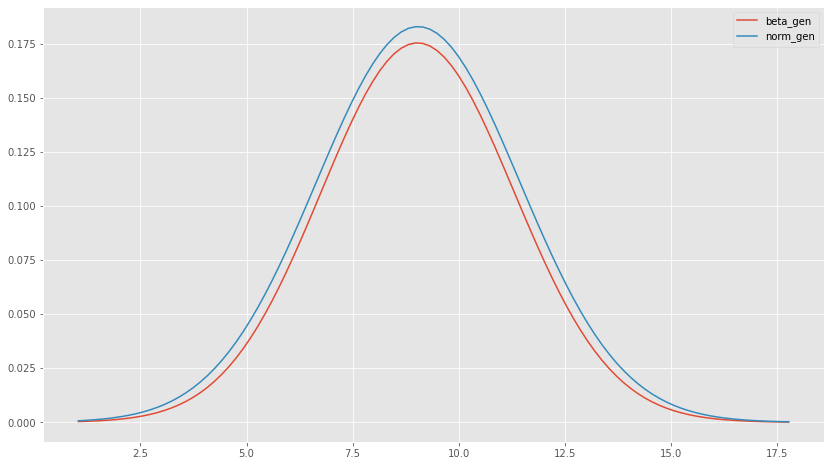

In [58]:
select_disctr(df['Night_Charge'], scipy.stats.beta, [9.04105244, 2.4], 1.1)

In [79]:
# Сэмплирование методом accept-reject
def accept_reject(array, distribution, M, params):
    args = distribution.fit(array)
    
    samples = []
    N = 10000
    for _ in range(N):
        x = np.random.normal(*params)

        prob_accept = distribution.pdf(x, *args) / (M * scipy.stats.norm.pdf(x, *params))

        if np.random.random() < prob_accept:
            samples.append(x)
    
    plt.hist(samples, bins=200, density=True, label = 'sample')
    x_plot = np.linspace(np.min(array), np.max(array), 100)
    y_plot = distribution.pdf(x_plot, *args)
    sns.lineplot(x_plot, y_plot, label=type(distribution).__name__)

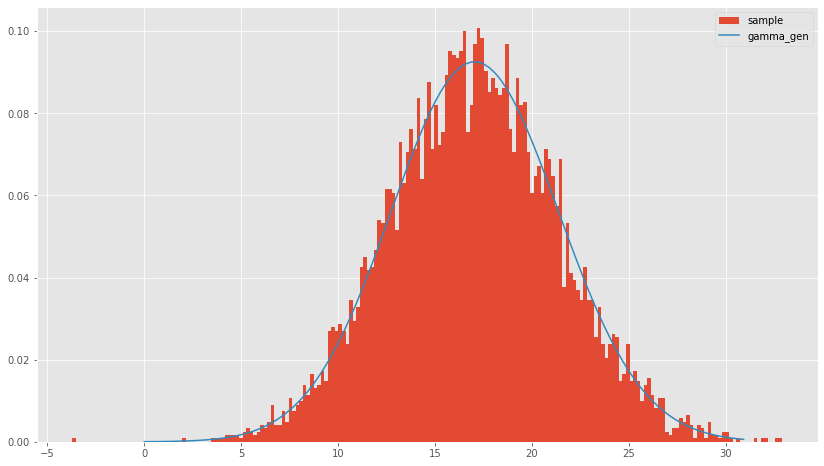

In [80]:
accept_reject(df['Eve_Charge'], scipy.stats.gamma, 1.5, [17.09442093 , 6.2])

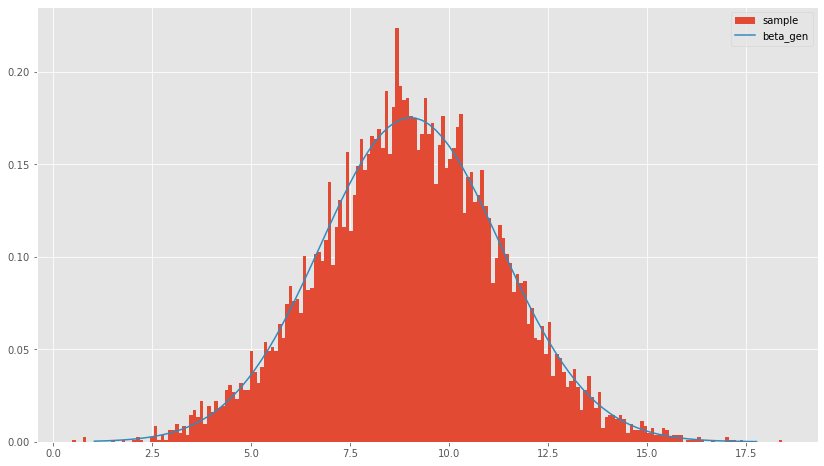

In [61]:
accept_reject(df['Night_Charge'], scipy.stats.beta, 1.1, [9.04105244, 2.4])